In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()


In [3]:
train = pd.read_csv('Train_v2.csv')
test = pd.read_csv('Test_v2.csv')
print('train size:', train.shape )
print('test size:', test.shape )

train size: (23524, 13)
test size: (10086, 12)


In [4]:
train.head()    

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


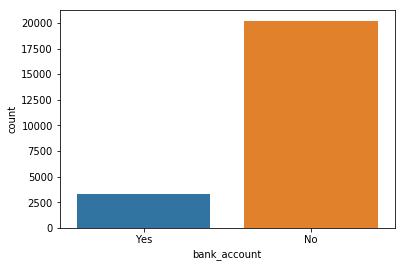

In [6]:
sns.countplot(train['bank_account'])

In [7]:
train.bank_account.value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [8]:
train.country.value_counts()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

In [9]:
train.describe(include =np.object)


,country,uniqueid,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524,23524,23524,23524,23524,23524,23524,23524,23524
unique,4,8735,2,2,2,2,6,5,6,10
top,Rwanda,uniqueid_421,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,4,20212,14343,17454,13877,12831,10749,12791,6437


the unique id which is meant to be the primary key is flawed in the sense that we have repetitions so its either that a record was taken more than once or they were errors in recording

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
country                   10086 non-null object
year                      10086 non-null int64
uniqueid                  10086 non-null object
location_type             10086 non-null object
cellphone_access          10086 non-null object
household_size            10086 non-null int64
age_of_respondent         10086 non-null int64
gender_of_respondent      10086 non-null object
relationship_with_head    10086 non-null object
marital_status            10086 non-null object
education_level           10086 non-null object
job_type                  10086 non-null object
dtypes: int64(3), object(9)
memory usage: 945.6+ KB


In [12]:
ntrain = train.shape[0]
ntest = test.shape[0]
fulldata = pd.concat((train, test)).reset_index(drop = 'true')
print(ntrain , ntest, 'fulldata size:', fulldata.shape)

23524 10086 fulldata size: (33610, 13)


C:\Users\olugbenle enoch\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
fulldata.dtypes

age_of_respondent          int64
bank_account              object
cellphone_access          object
country                   object
education_level           object
gender_of_respondent      object
household_size             int64
job_type                  object
location_type             object
marital_status            object
relationship_with_head    object
uniqueid                  object
year                       int64
dtype: object

In [14]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33610 entries, 0 to 33609
Data columns (total 13 columns):
age_of_respondent         33610 non-null int64
bank_account              23524 non-null object
cellphone_access          33610 non-null object
country                   33610 non-null object
education_level           33610 non-null object
gender_of_respondent      33610 non-null object
household_size            33610 non-null int64
job_type                  33610 non-null object
location_type             33610 non-null object
marital_status            33610 non-null object
relationship_with_head    33610 non-null object
uniqueid                  33610 non-null object
year                      33610 non-null int64
dtypes: int64(3), object(10)
memory usage: 3.3+ MB


In [15]:
fulldata.drop('uniqueid', axis = 1, inplace = True)

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder_fulldata = LabelEncoder()
fulldata['country'] = labelencoder_fulldata.fit_transform(fulldata['country'])
fulldata['cellphone_access'] = labelencoder_fulldata.fit_transform(fulldata['cellphone_access'])
fulldata['education_level'] = labelencoder_fulldata.fit_transform(fulldata['education_level'])
fulldata['gender_of_respondent'] = labelencoder_fulldata.fit_transform(fulldata['gender_of_respondent'])
fulldata['job_type'] = labelencoder_fulldata.fit_transform(fulldata['job_type'])
fulldata['location_type'] = labelencoder_fulldata.fit_transform(fulldata['location_type'])
fulldata['marital_status'] = labelencoder_fulldata.fit_transform(fulldata['marital_status'])
fulldata['relationship_with_head'] = labelencoder_fulldata.fit_transform(fulldata['relationship_with_head'])

In [17]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33610 entries, 0 to 33609
Data columns (total 12 columns):
age_of_respondent         33610 non-null int64
bank_account              23524 non-null object
cellphone_access          33610 non-null int32
country                   33610 non-null int32
education_level           33610 non-null int32
gender_of_respondent      33610 non-null int32
household_size            33610 non-null int64
job_type                  33610 non-null int32
location_type             33610 non-null int32
marital_status            33610 non-null int32
relationship_with_head    33610 non-null int32
year                      33610 non-null int64
dtypes: int32(8), int64(3), object(1)
memory usage: 2.1+ MB


In [18]:
fulldata['bank_account'] = [1 if bank_account == 'Yes' else 0 if bank_account == 'No' else None \
                           for bank_account in list(fulldata['bank_account'].values)]

In [19]:
fulldata.head()

,age_of_respondent,bank_account,cellphone_access,country,education_level,gender_of_respondent,household_size,job_type,location_type,marital_status,relationship_with_head,year
0,24,1.0,1,0,3,0,3,9,0,2,5,2018
1,70,0.0,0,0,0,0,5,4,0,4,1,2018
2,26,1.0,1,0,5,1,5,9,1,3,3,2018
3,34,0.0,1,0,2,0,5,3,0,2,1,2018
4,26,0.0,0,0,2,1,8,5,1,3,0,2018


In [20]:
dc = pd.get_dummies(fulldata['country'], prefix = 'country')
de = pd.get_dummies(fulldata['education_level'], prefix = 'level')
dj = pd.get_dummies(fulldata['job_type'], prefix = 'job')
dm = pd.get_dummies(fulldata['marital_status'], prefix = 'status')
dr = pd.get_dummies(fulldata['relationship_with_head'], prefix = 'relationship')

fulldata.corr()
plt.figure(figsize=(12,8))
sns.heatmap(fulldata.corr(),annot=True)

In [21]:
fulldata = pd.concat((fulldata, de, dj, dc, dm, dr), axis = 1).reset_index(drop = 'true')

In [22]:
fulldata.head()

,age_of_respondent,bank_account,cellphone_access,country,education_level,gender_of_respondent,household_size,job_type,location_type,marital_status,...,status_1,status_2,status_3,status_4,relationship_0,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5
0,24,1.0,1,0,3,0,3,9,0,2,...,0,1,0,0,0,0,0,0,0,1
1,70,0.0,0,0,0,0,5,4,0,4,...,0,0,0,1,0,1,0,0,0,0
2,26,1.0,1,0,5,1,5,9,1,3,...,0,0,1,0,0,0,0,1,0,0
3,34,0.0,1,0,2,0,5,3,0,2,...,0,1,0,0,0,1,0,0,0,0
4,26,0.0,0,0,2,1,8,5,1,3,...,0,0,1,0,1,0,0,0,0,0


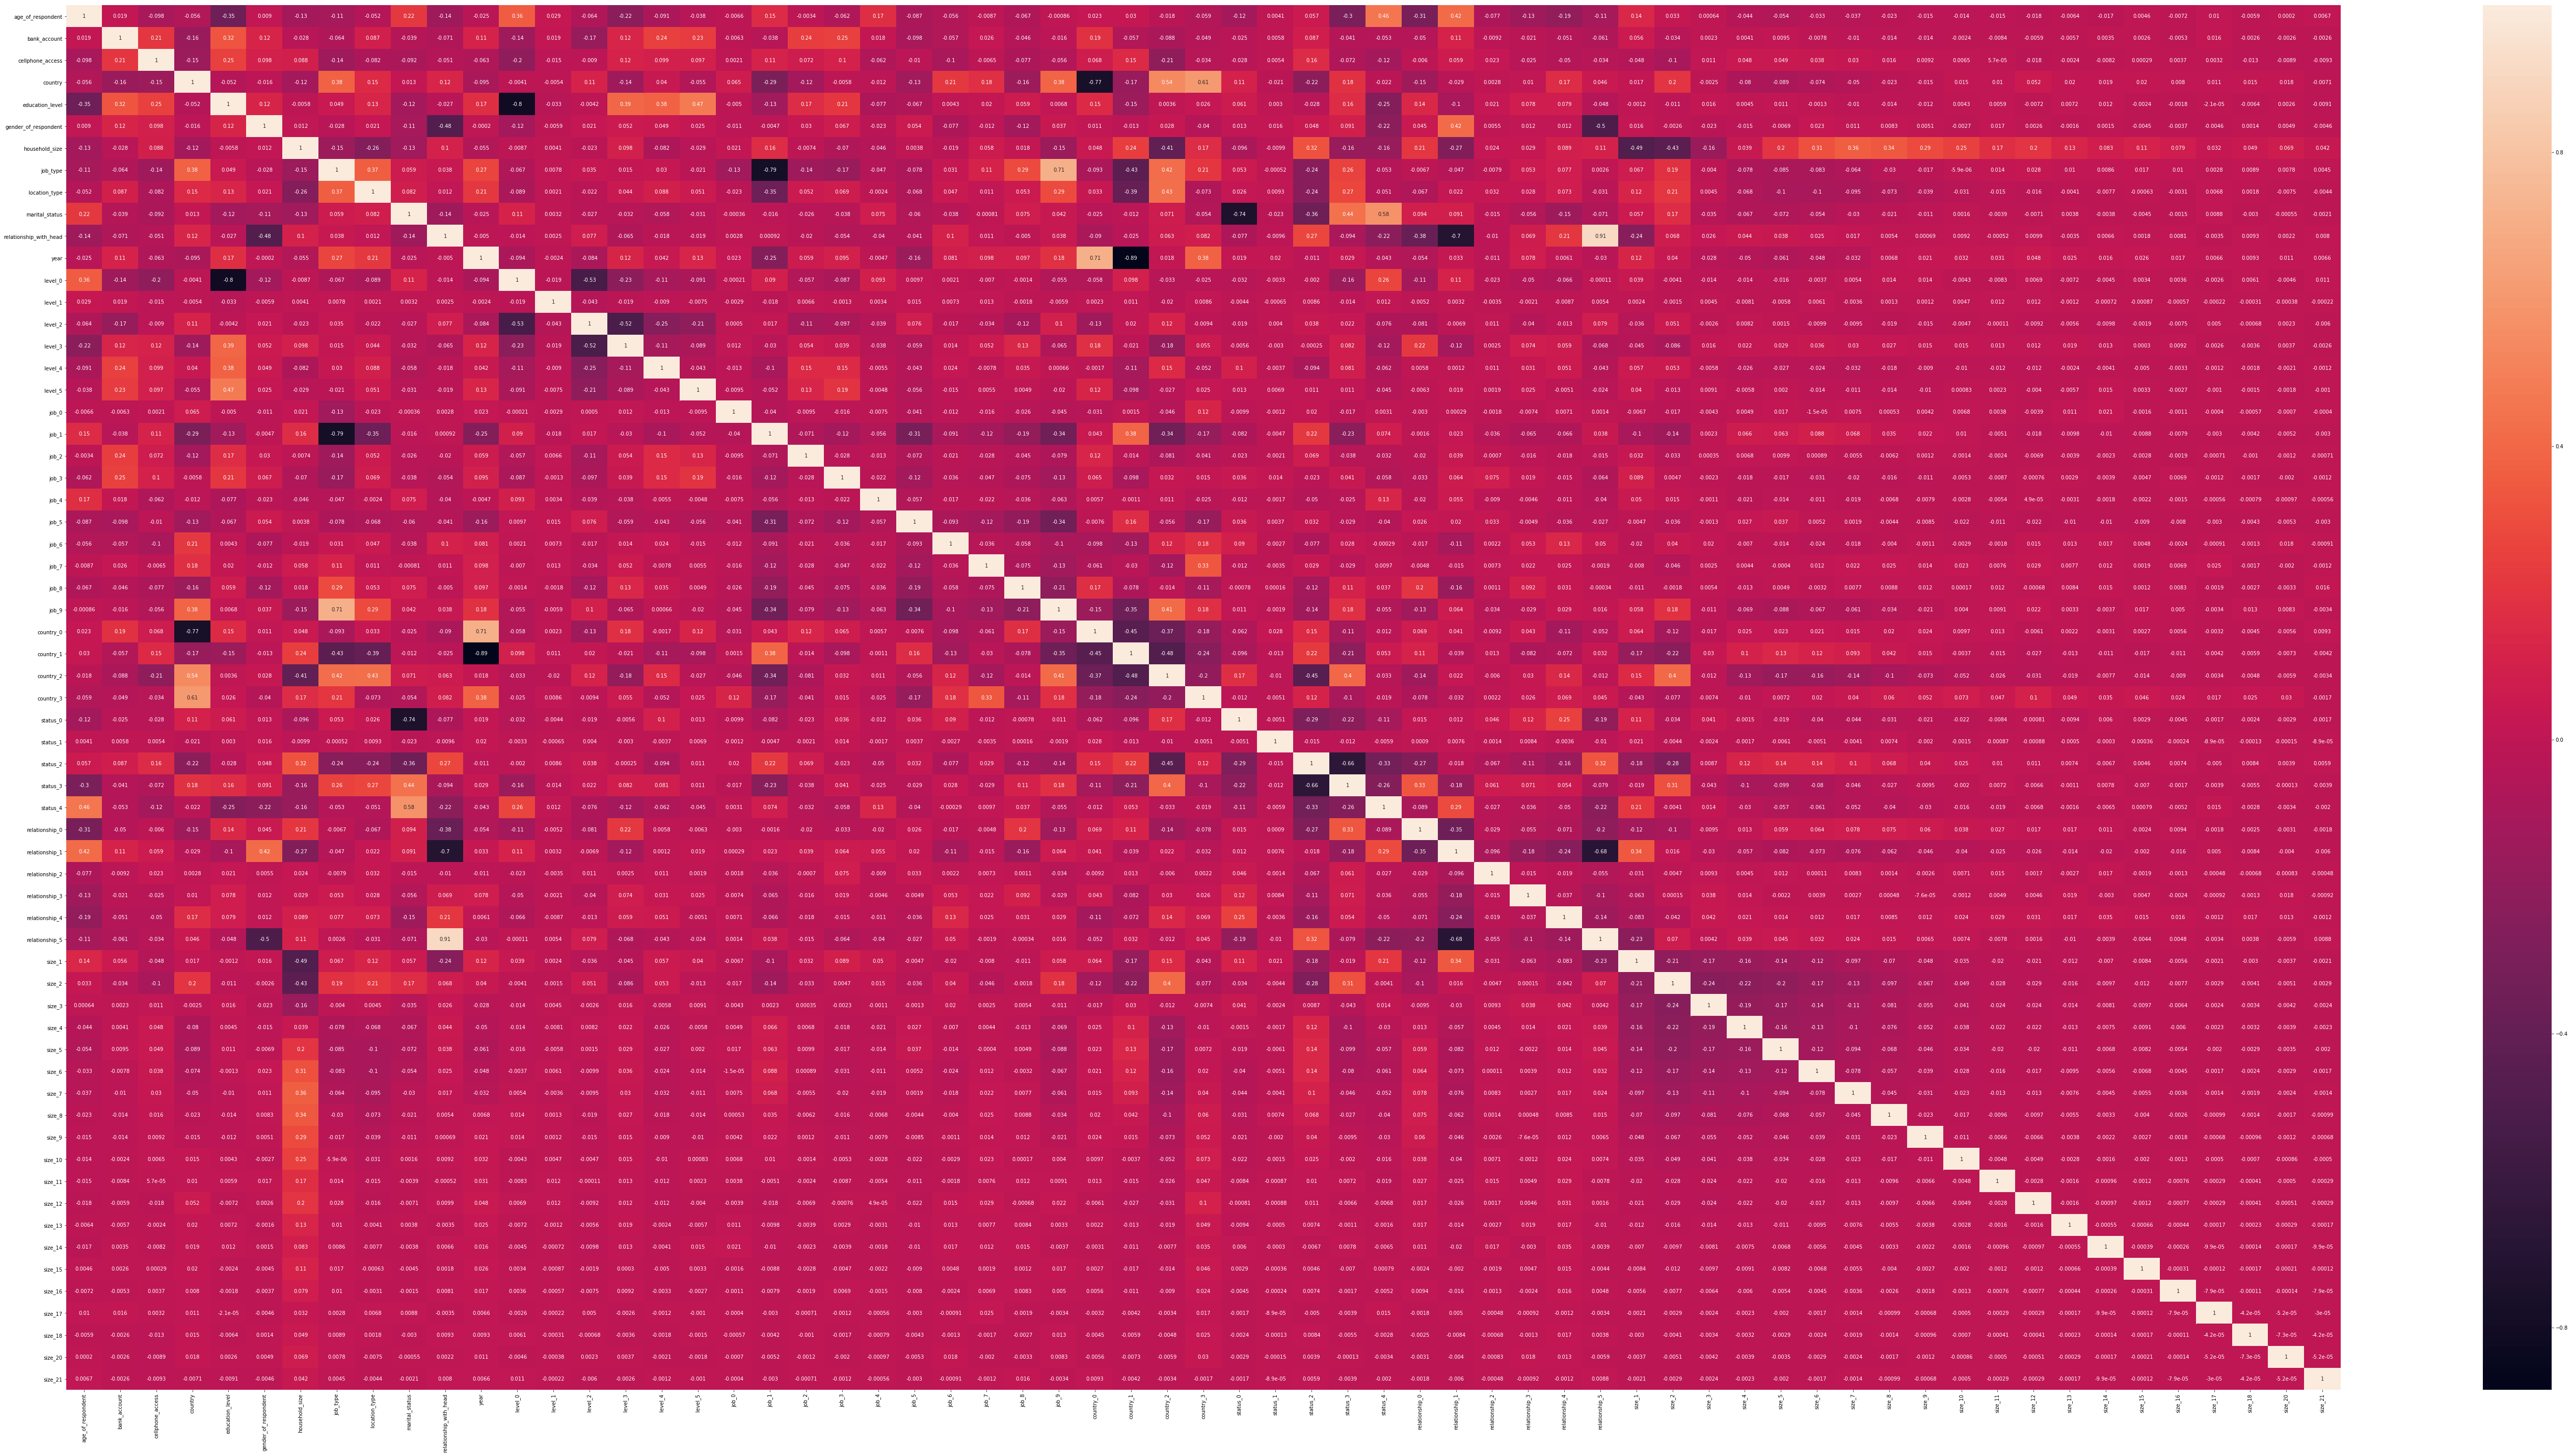

In [77]:
fulldata.corr()
plt.figure(figsize=(100,50))
sns.heatmap(fulldata.corr(),annot=True)

fulldata.drop('age_of_respondent', axis = 1, inplace = True)
fulldata.drop('year', axis = 1, inplace = True)

In [24]:
features = fulldata.columns.values

In [25]:
features

array(['age_of_respondent', 'bank_account', 'cellphone_access', 'country',
       'education_level', 'gender_of_respondent', 'household_size',
       'job_type', 'location_type', 'marital_status',
       'relationship_with_head', 'year', 'level_0', 'level_1', 'level_2',
       'level_3', 'level_4', 'level_5', 'job_0', 'job_1', 'job_2',
       'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9',
       'country_0', 'country_1', 'country_2', 'country_3', 'status_0',
       'status_1', 'status_2', 'status_3', 'status_4', 'relationship_0',
       'relationship_1', 'relationship_2', 'relationship_3',
       'relationship_4', 'relationship_5'], dtype=object)

In [26]:
ready_train = fulldata[:ntrain]
ready_test = fulldata[ntrain:]

In [27]:

#Separate training features from target
readyx_train = ready_train#.drop(['bank_account'], axis=1)
readyy_train = ready_train['bank_account']


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_rescaled = scaler.fit_transform(ready_train)
X_test_rescaled = scaler.fit_transform(ready_test)

C:\Users\olugbenle enoch\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\olugbenle enoch\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\olugbenle enoch\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:364: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\olugbenle enoch\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:365: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [149]:
xtscaled = pd.DataFrame(X_train_rescaled, columns = features)

In [150]:
xtscaled = xtscaled.drop(['bank_account','country',
       'education_level', 'marital_status',
       'relationship_with_head', 'job_type','year'], axis=1)

In [33]:
xtescaled = pd.DataFrame(X_test_rescaled, columns = features)

In [34]:
xtscaled.shape

(23524, 36)

In [35]:
X= xtscaled
y = readyy_train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train) 
from sklearn.metrics import f1_score
pred = model1.predict(X_test)
f1_score(pred,y_test)

C:\Users\olugbenle enoch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.47704590818363274

In [37]:
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, pred))
print("Precision: ", metrics.precision_score(y_test, pred))
print("Recall: ", metrics.recall_score(y_test, pred))

Accuracy:  0.8886291179596174
Precision:  0.7029411764705882
Recall:  0.3610271903323263


In [38]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
predd = classifier.predict(X_test)
f1_score(predd,y_test)

0.4429065743944637

In [39]:
from sklearn.metrics import accuracy_score
1 - accuracy_score(predd,y_test)

0.13687566418703512

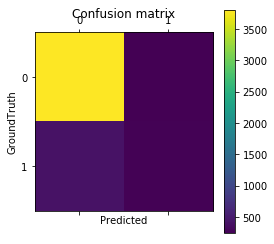

[[3805  238]
 [ 406  256]]


In [40]:
# Plot confusion Matrix
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)
conftable(y_test,predd,"conf")

In [141]:
import xgboost as xgb
from xgboost import XGBClassifier
# fit model no training data
model33 = XGBClassifier(min_child_weight = 3, gamma = 0.5, subsample = 0.6, colsample_bytree = 0.6, max_depth = 3, learning_rate=0.109)
model33.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0.5, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.109, max_delta_step=0, max_depth=3,
       min_child_weight=3, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=0.6, tree_method=None,
       validate_parameters=False, verbosity=None)

In [142]:
y_pred = model33.predict(X_test) 

In [143]:
f1_score(y_pred,y_test)

0.47852760736196315

In [144]:
from sklearn.metrics import accuracy_score
1 - accuracy_score(y_pred,y_test)

0.10839532412327313

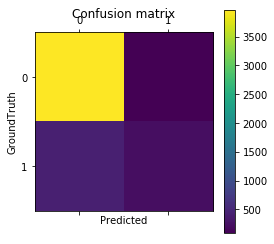

[[3960   83]
 [ 430  232]]


In [145]:
conftable(y_test,y_pred,"conf")

In [145]:
from catboost import CatBoostClassifier
model44 = CatBoostClassifier(iterations= 5000, learning_rate=0.003)
model44.fit(X_train, y_train,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6900634	test: 0.6900346	best: 0.6900346 (0)	total: 33ms	remaining: 2m 45s
1:	learn: 0.6871301	test: 0.6871040	best: 0.6871040 (1)	total: 52.6ms	remaining: 2m 11s
2:	learn: 0.6844022	test: 0.6843767	best: 0.6843767 (2)	total: 69.6ms	remaining: 1m 55s
3:	learn: 0.6817518	test: 0.6817228	best: 0.6817228 (3)	total: 88.3ms	remaining: 1m 50s
4:	learn: 0.6788517	test: 0.6788159	best: 0.6788159 (4)	total: 104ms	remaining: 1m 43s
5:	learn: 0.6760633	test: 0.6760218	best: 0.6760218 (5)	total: 117ms	remaining: 1m 37s
6:	learn: 0.6730767	test: 0.6730386	best: 0.6730386 (6)	total: 133ms	remaining: 1m 35s
7:	learn: 0.6706499	test: 0.6705935	best: 0.6705935 (7)	total: 151ms	remaining: 1m 33s
8:	learn: 0.6677798	test: 0.6677239	best: 0.6677239 (8)	total: 187ms	remaining: 1m 43s
9:	learn: 0.6650896	test: 0.6650524	best: 0.6650524 (9)	total: 219ms	remaining: 1m 49s
10:	learn: 0.6626531	test: 0.6626082	best: 0.6626082 (10)	total: 244ms	remaining: 1m 50s
11:	learn: 0.6597592	test: 0.6596952	be

95:	learn: 0.4980060	test: 0.4976280	best: 0.4976280 (95)	total: 1.94s	remaining: 1m 39s
96:	learn: 0.4967723	test: 0.4963780	best: 0.4963780 (96)	total: 2.02s	remaining: 1m 42s
97:	learn: 0.4956633	test: 0.4952542	best: 0.4952542 (97)	total: 2.04s	remaining: 1m 41s
98:	learn: 0.4944434	test: 0.4940364	best: 0.4940364 (98)	total: 2.1s	remaining: 1m 43s
99:	learn: 0.4928083	test: 0.4924175	best: 0.4924175 (99)	total: 2.12s	remaining: 1m 43s
100:	learn: 0.4914017	test: 0.4910090	best: 0.4910090 (100)	total: 2.16s	remaining: 1m 44s
101:	learn: 0.4901802	test: 0.4897888	best: 0.4897888 (101)	total: 2.18s	remaining: 1m 44s
102:	learn: 0.4887839	test: 0.4883904	best: 0.4883904 (102)	total: 2.21s	remaining: 1m 44s
103:	learn: 0.4876450	test: 0.4872511	best: 0.4872511 (103)	total: 2.25s	remaining: 1m 45s
104:	learn: 0.4861959	test: 0.4857814	best: 0.4857814 (104)	total: 2.27s	remaining: 1m 45s
105:	learn: 0.4848530	test: 0.4844362	best: 0.4844362 (105)	total: 2.31s	remaining: 1m 46s
106:	learn

186:	learn: 0.4084845	test: 0.4074959	best: 0.4074959 (186)	total: 4.25s	remaining: 1m 49s
187:	learn: 0.4077804	test: 0.4067909	best: 0.4067909 (187)	total: 4.28s	remaining: 1m 49s
188:	learn: 0.4071457	test: 0.4061545	best: 0.4061545 (188)	total: 4.32s	remaining: 1m 50s
189:	learn: 0.4063422	test: 0.4053365	best: 0.4053365 (189)	total: 4.36s	remaining: 1m 50s
190:	learn: 0.4055744	test: 0.4045772	best: 0.4045772 (190)	total: 4.39s	remaining: 1m 50s
191:	learn: 0.4049406	test: 0.4039304	best: 0.4039304 (191)	total: 4.43s	remaining: 1m 50s
192:	learn: 0.4042669	test: 0.4032498	best: 0.4032498 (192)	total: 4.46s	remaining: 1m 50s
193:	learn: 0.4035223	test: 0.4025030	best: 0.4025030 (193)	total: 4.5s	remaining: 1m 51s
194:	learn: 0.4028361	test: 0.4018109	best: 0.4018109 (194)	total: 4.55s	remaining: 1m 52s
195:	learn: 0.4022056	test: 0.4011672	best: 0.4011672 (195)	total: 4.59s	remaining: 1m 52s
196:	learn: 0.4014784	test: 0.4004470	best: 0.4004470 (196)	total: 4.62s	remaining: 1m 52s


283:	learn: 0.3571875	test: 0.3557545	best: 0.3557545 (283)	total: 7.39s	remaining: 2m 2s
284:	learn: 0.3568012	test: 0.3553674	best: 0.3553674 (284)	total: 7.43s	remaining: 2m 2s
285:	learn: 0.3563231	test: 0.3548979	best: 0.3548979 (285)	total: 7.46s	remaining: 2m 2s
286:	learn: 0.3560385	test: 0.3545992	best: 0.3545992 (286)	total: 7.48s	remaining: 2m 2s
287:	learn: 0.3556725	test: 0.3542189	best: 0.3542189 (287)	total: 7.5s	remaining: 2m 2s
288:	learn: 0.3552988	test: 0.3538359	best: 0.3538359 (288)	total: 7.51s	remaining: 2m 2s
289:	learn: 0.3549264	test: 0.3534622	best: 0.3534622 (289)	total: 7.54s	remaining: 2m 2s
290:	learn: 0.3545375	test: 0.3530786	best: 0.3530786 (290)	total: 7.57s	remaining: 2m 2s
291:	learn: 0.3541857	test: 0.3527237	best: 0.3527237 (291)	total: 7.6s	remaining: 2m 2s
292:	learn: 0.3537987	test: 0.3523328	best: 0.3523328 (292)	total: 7.64s	remaining: 2m 2s
293:	learn: 0.3534582	test: 0.3519899	best: 0.3519899 (293)	total: 7.67s	remaining: 2m 2s
294:	learn: 

380:	learn: 0.3299607	test: 0.3281963	best: 0.3281963 (380)	total: 10.2s	remaining: 2m 3s
381:	learn: 0.3297467	test: 0.3279665	best: 0.3279665 (381)	total: 10.2s	remaining: 2m 3s
382:	learn: 0.3295395	test: 0.3277584	best: 0.3277584 (382)	total: 10.3s	remaining: 2m 3s
383:	learn: 0.3293436	test: 0.3275596	best: 0.3275596 (383)	total: 10.3s	remaining: 2m 3s
384:	learn: 0.3290976	test: 0.3273039	best: 0.3273039 (384)	total: 10.3s	remaining: 2m 3s
385:	learn: 0.3288271	test: 0.3270342	best: 0.3270342 (385)	total: 10.4s	remaining: 2m 3s
386:	learn: 0.3286312	test: 0.3268245	best: 0.3268245 (386)	total: 10.4s	remaining: 2m 3s
387:	learn: 0.3284262	test: 0.3266209	best: 0.3266209 (387)	total: 10.4s	remaining: 2m 3s
388:	learn: 0.3282058	test: 0.3264035	best: 0.3264035 (388)	total: 10.4s	remaining: 2m 3s
389:	learn: 0.3279792	test: 0.3261743	best: 0.3261743 (389)	total: 10.5s	remaining: 2m 3s
390:	learn: 0.3276999	test: 0.3258978	best: 0.3258978 (390)	total: 10.5s	remaining: 2m 3s
391:	learn

476:	learn: 0.3132692	test: 0.3113136	best: 0.3113136 (476)	total: 13.1s	remaining: 2m 4s
477:	learn: 0.3130853	test: 0.3111318	best: 0.3111318 (477)	total: 13.2s	remaining: 2m 4s
478:	learn: 0.3130001	test: 0.3110436	best: 0.3110436 (478)	total: 13.2s	remaining: 2m 4s
479:	learn: 0.3128319	test: 0.3108790	best: 0.3108790 (479)	total: 13.2s	remaining: 2m 4s
480:	learn: 0.3126909	test: 0.3107375	best: 0.3107375 (480)	total: 13.2s	remaining: 2m 4s
481:	learn: 0.3125236	test: 0.3105674	best: 0.3105674 (481)	total: 13.3s	remaining: 2m 4s
482:	learn: 0.3123601	test: 0.3104033	best: 0.3104033 (482)	total: 13.3s	remaining: 2m 4s
483:	learn: 0.3122240	test: 0.3102700	best: 0.3102700 (483)	total: 13.3s	remaining: 2m 4s
484:	learn: 0.3120966	test: 0.3101398	best: 0.3101398 (484)	total: 13.4s	remaining: 2m 4s
485:	learn: 0.3119621	test: 0.3100071	best: 0.3100071 (485)	total: 13.4s	remaining: 2m 4s
486:	learn: 0.3118636	test: 0.3099008	best: 0.3099008 (486)	total: 13.4s	remaining: 2m 4s
487:	learn

568:	learn: 0.3032906	test: 0.3012482	best: 0.3012482 (568)	total: 16s	remaining: 2m 4s
569:	learn: 0.3031637	test: 0.3011212	best: 0.3011212 (569)	total: 16s	remaining: 2m 4s
570:	learn: 0.3030768	test: 0.3010345	best: 0.3010345 (570)	total: 16s	remaining: 2m 4s
571:	learn: 0.3029541	test: 0.3009197	best: 0.3009197 (571)	total: 16.1s	remaining: 2m 4s
572:	learn: 0.3028559	test: 0.3008207	best: 0.3008207 (572)	total: 16.2s	remaining: 2m 4s
573:	learn: 0.3027733	test: 0.3007339	best: 0.3007339 (573)	total: 16.2s	remaining: 2m 4s
574:	learn: 0.3026904	test: 0.3006522	best: 0.3006522 (574)	total: 16.2s	remaining: 2m 4s
575:	learn: 0.3026021	test: 0.3005603	best: 0.3005603 (575)	total: 16.2s	remaining: 2m 4s
576:	learn: 0.3025459	test: 0.3004990	best: 0.3004990 (576)	total: 16.3s	remaining: 2m 4s
577:	learn: 0.3024825	test: 0.3004363	best: 0.3004363 (577)	total: 16.3s	remaining: 2m 4s
578:	learn: 0.3023944	test: 0.3003530	best: 0.3003530 (578)	total: 16.3s	remaining: 2m 4s
579:	learn: 0.30

661:	learn: 0.2961751	test: 0.2941272	best: 0.2941272 (661)	total: 18.7s	remaining: 2m 2s
662:	learn: 0.2961081	test: 0.2940638	best: 0.2940638 (662)	total: 18.8s	remaining: 2m 2s
663:	learn: 0.2960195	test: 0.2939785	best: 0.2939785 (663)	total: 18.8s	remaining: 2m 2s
664:	learn: 0.2959549	test: 0.2939151	best: 0.2939151 (664)	total: 18.9s	remaining: 2m 2s
665:	learn: 0.2959083	test: 0.2938687	best: 0.2938687 (665)	total: 18.9s	remaining: 2m 3s
666:	learn: 0.2958682	test: 0.2938318	best: 0.2938318 (666)	total: 19s	remaining: 2m 3s
667:	learn: 0.2958181	test: 0.2937826	best: 0.2937826 (667)	total: 19s	remaining: 2m 3s
668:	learn: 0.2957569	test: 0.2937213	best: 0.2937213 (668)	total: 19s	remaining: 2m 3s
669:	learn: 0.2957080	test: 0.2936768	best: 0.2936768 (669)	total: 19.1s	remaining: 2m 3s
670:	learn: 0.2956477	test: 0.2936050	best: 0.2936050 (670)	total: 19.1s	remaining: 2m 3s
671:	learn: 0.2956054	test: 0.2935691	best: 0.2935691 (671)	total: 19.1s	remaining: 2m 3s
672:	learn: 0.29

754:	learn: 0.2914146	test: 0.2895688	best: 0.2895688 (754)	total: 21.7s	remaining: 2m 1s
755:	learn: 0.2913689	test: 0.2895221	best: 0.2895221 (755)	total: 21.7s	remaining: 2m 1s
756:	learn: 0.2913279	test: 0.2894839	best: 0.2894839 (756)	total: 21.7s	remaining: 2m 1s
757:	learn: 0.2912929	test: 0.2894504	best: 0.2894504 (757)	total: 21.7s	remaining: 2m 1s
758:	learn: 0.2912535	test: 0.2894144	best: 0.2894144 (758)	total: 21.8s	remaining: 2m 1s
759:	learn: 0.2912091	test: 0.2893689	best: 0.2893689 (759)	total: 21.8s	remaining: 2m 1s
760:	learn: 0.2911785	test: 0.2893337	best: 0.2893337 (760)	total: 21.8s	remaining: 2m 1s
761:	learn: 0.2911296	test: 0.2892845	best: 0.2892845 (761)	total: 21.8s	remaining: 2m 1s
762:	learn: 0.2911097	test: 0.2892670	best: 0.2892670 (762)	total: 21.9s	remaining: 2m 1s
763:	learn: 0.2910726	test: 0.2892377	best: 0.2892377 (763)	total: 21.9s	remaining: 2m 1s
764:	learn: 0.2910140	test: 0.2891838	best: 0.2891838 (764)	total: 21.9s	remaining: 2m 1s
765:	learn

854:	learn: 0.2875113	test: 0.2857851	best: 0.2857851 (854)	total: 24.7s	remaining: 1m 59s
855:	learn: 0.2874849	test: 0.2857570	best: 0.2857570 (855)	total: 24.8s	remaining: 1m 59s
856:	learn: 0.2874381	test: 0.2857106	best: 0.2857106 (856)	total: 24.8s	remaining: 1m 59s
857:	learn: 0.2874173	test: 0.2856903	best: 0.2856903 (857)	total: 24.8s	remaining: 1m 59s
858:	learn: 0.2873860	test: 0.2856614	best: 0.2856614 (858)	total: 24.8s	remaining: 1m 59s
859:	learn: 0.2873510	test: 0.2856314	best: 0.2856314 (859)	total: 24.9s	remaining: 1m 59s
860:	learn: 0.2873270	test: 0.2856079	best: 0.2856079 (860)	total: 24.9s	remaining: 1m 59s
861:	learn: 0.2873043	test: 0.2855861	best: 0.2855861 (861)	total: 24.9s	remaining: 1m 59s
862:	learn: 0.2872712	test: 0.2855549	best: 0.2855549 (862)	total: 25s	remaining: 1m 59s
863:	learn: 0.2872452	test: 0.2855286	best: 0.2855286 (863)	total: 25s	remaining: 1m 59s
864:	learn: 0.2872115	test: 0.2854973	best: 0.2854973 (864)	total: 25s	remaining: 1m 59s
865:	

948:	learn: 0.2845609	test: 0.2830829	best: 0.2830829 (948)	total: 27.6s	remaining: 1m 57s
949:	learn: 0.2845479	test: 0.2830707	best: 0.2830707 (949)	total: 27.6s	remaining: 1m 57s
950:	learn: 0.2845179	test: 0.2830434	best: 0.2830434 (950)	total: 27.6s	remaining: 1m 57s
951:	learn: 0.2844917	test: 0.2830181	best: 0.2830181 (951)	total: 27.7s	remaining: 1m 57s
952:	learn: 0.2844563	test: 0.2829903	best: 0.2829903 (952)	total: 27.7s	remaining: 1m 57s
953:	learn: 0.2844364	test: 0.2829712	best: 0.2829712 (953)	total: 27.7s	remaining: 1m 57s
954:	learn: 0.2844045	test: 0.2829414	best: 0.2829414 (954)	total: 27.8s	remaining: 1m 57s
955:	learn: 0.2843850	test: 0.2829241	best: 0.2829241 (955)	total: 27.8s	remaining: 1m 57s
956:	learn: 0.2843598	test: 0.2829010	best: 0.2829010 (956)	total: 27.8s	remaining: 1m 57s
957:	learn: 0.2843369	test: 0.2828718	best: 0.2828718 (957)	total: 27.8s	remaining: 1m 57s
958:	learn: 0.2843181	test: 0.2828573	best: 0.2828573 (958)	total: 27.9s	remaining: 1m 57s

1042:	learn: 0.2824022	test: 0.2811634	best: 0.2811634 (1042)	total: 31.5s	remaining: 1m 59s
1043:	learn: 0.2823767	test: 0.2811401	best: 0.2811401 (1043)	total: 31.6s	remaining: 1m 59s
1044:	learn: 0.2823484	test: 0.2811119	best: 0.2811119 (1044)	total: 31.6s	remaining: 1m 59s
1045:	learn: 0.2823287	test: 0.2810939	best: 0.2810939 (1045)	total: 31.6s	remaining: 1m 59s
1046:	learn: 0.2822990	test: 0.2810713	best: 0.2810713 (1046)	total: 31.7s	remaining: 1m 59s
1047:	learn: 0.2822765	test: 0.2810599	best: 0.2810599 (1047)	total: 31.7s	remaining: 1m 59s
1048:	learn: 0.2822499	test: 0.2810383	best: 0.2810383 (1048)	total: 31.8s	remaining: 1m 59s
1049:	learn: 0.2822311	test: 0.2810214	best: 0.2810214 (1049)	total: 31.8s	remaining: 1m 59s
1050:	learn: 0.2822149	test: 0.2810091	best: 0.2810091 (1050)	total: 31.8s	remaining: 1m 59s
1051:	learn: 0.2821874	test: 0.2809899	best: 0.2809899 (1051)	total: 31.9s	remaining: 1m 59s
1052:	learn: 0.2821608	test: 0.2809661	best: 0.2809661 (1052)	total: 3

1136:	learn: 0.2804725	test: 0.2795274	best: 0.2795274 (1136)	total: 34.8s	remaining: 1m 58s
1137:	learn: 0.2804587	test: 0.2795141	best: 0.2795141 (1137)	total: 34.8s	remaining: 1m 58s
1138:	learn: 0.2804397	test: 0.2794962	best: 0.2794962 (1138)	total: 34.8s	remaining: 1m 58s
1139:	learn: 0.2804237	test: 0.2794836	best: 0.2794836 (1139)	total: 34.9s	remaining: 1m 58s
1140:	learn: 0.2804118	test: 0.2794742	best: 0.2794742 (1140)	total: 34.9s	remaining: 1m 57s
1141:	learn: 0.2804007	test: 0.2794644	best: 0.2794644 (1141)	total: 34.9s	remaining: 1m 57s
1142:	learn: 0.2803788	test: 0.2794460	best: 0.2794460 (1142)	total: 34.9s	remaining: 1m 57s
1143:	learn: 0.2803617	test: 0.2794246	best: 0.2794246 (1143)	total: 35s	remaining: 1m 57s
1144:	learn: 0.2803469	test: 0.2794104	best: 0.2794104 (1144)	total: 35s	remaining: 1m 57s
1145:	learn: 0.2803332	test: 0.2794000	best: 0.2794000 (1145)	total: 35s	remaining: 1m 57s
1146:	learn: 0.2803170	test: 0.2793848	best: 0.2793848 (1146)	total: 35s	rem

1231:	learn: 0.2788932	test: 0.2782281	best: 0.2782281 (1231)	total: 37.6s	remaining: 1m 55s
1232:	learn: 0.2788762	test: 0.2782138	best: 0.2782138 (1232)	total: 37.6s	remaining: 1m 55s
1233:	learn: 0.2788574	test: 0.2782000	best: 0.2782000 (1233)	total: 37.7s	remaining: 1m 55s
1234:	learn: 0.2788456	test: 0.2781926	best: 0.2781926 (1234)	total: 37.7s	remaining: 1m 55s
1235:	learn: 0.2788349	test: 0.2781867	best: 0.2781867 (1235)	total: 37.7s	remaining: 1m 54s
1236:	learn: 0.2788129	test: 0.2781731	best: 0.2781731 (1236)	total: 37.8s	remaining: 1m 55s
1237:	learn: 0.2787962	test: 0.2781601	best: 0.2781601 (1237)	total: 37.9s	remaining: 1m 55s
1238:	learn: 0.2787754	test: 0.2781399	best: 0.2781399 (1238)	total: 37.9s	remaining: 1m 55s
1239:	learn: 0.2787625	test: 0.2781221	best: 0.2781221 (1239)	total: 38s	remaining: 1m 55s
1240:	learn: 0.2787445	test: 0.2781053	best: 0.2781053 (1240)	total: 38s	remaining: 1m 55s
1241:	learn: 0.2787349	test: 0.2780968	best: 0.2780968 (1241)	total: 38s	r

1325:	learn: 0.2775244	test: 0.2771255	best: 0.2771255 (1325)	total: 40.6s	remaining: 1m 52s
1326:	learn: 0.2775055	test: 0.2771086	best: 0.2771086 (1326)	total: 40.6s	remaining: 1m 52s
1327:	learn: 0.2774954	test: 0.2770988	best: 0.2770988 (1327)	total: 40.7s	remaining: 1m 52s
1328:	learn: 0.2774802	test: 0.2770814	best: 0.2770814 (1328)	total: 40.7s	remaining: 1m 52s
1329:	learn: 0.2774712	test: 0.2770758	best: 0.2770758 (1329)	total: 40.8s	remaining: 1m 52s
1330:	learn: 0.2774598	test: 0.2770670	best: 0.2770670 (1330)	total: 40.8s	remaining: 1m 52s
1331:	learn: 0.2774478	test: 0.2770529	best: 0.2770529 (1331)	total: 40.8s	remaining: 1m 52s
1332:	learn: 0.2774372	test: 0.2770461	best: 0.2770461 (1332)	total: 40.9s	remaining: 1m 52s
1333:	learn: 0.2774245	test: 0.2770350	best: 0.2770350 (1333)	total: 40.9s	remaining: 1m 52s
1334:	learn: 0.2774090	test: 0.2770214	best: 0.2770214 (1334)	total: 40.9s	remaining: 1m 52s
1335:	learn: 0.2773955	test: 0.2770055	best: 0.2770055 (1335)	total: 4

1420:	learn: 0.2762978	test: 0.2762099	best: 0.2762099 (1420)	total: 43.6s	remaining: 1m 49s
1421:	learn: 0.2762838	test: 0.2762051	best: 0.2762051 (1421)	total: 43.7s	remaining: 1m 49s
1422:	learn: 0.2762722	test: 0.2762009	best: 0.2762009 (1422)	total: 43.7s	remaining: 1m 49s
1423:	learn: 0.2762594	test: 0.2761976	best: 0.2761976 (1423)	total: 43.8s	remaining: 1m 49s
1424:	learn: 0.2762463	test: 0.2761865	best: 0.2761865 (1424)	total: 43.9s	remaining: 1m 50s
1425:	learn: 0.2762329	test: 0.2761732	best: 0.2761732 (1425)	total: 43.9s	remaining: 1m 49s
1426:	learn: 0.2762185	test: 0.2761687	best: 0.2761687 (1426)	total: 43.9s	remaining: 1m 49s
1427:	learn: 0.2762018	test: 0.2761593	best: 0.2761593 (1427)	total: 43.9s	remaining: 1m 49s
1428:	learn: 0.2761875	test: 0.2761442	best: 0.2761442 (1428)	total: 44s	remaining: 1m 49s
1429:	learn: 0.2761766	test: 0.2761388	best: 0.2761388 (1429)	total: 44s	remaining: 1m 49s
1430:	learn: 0.2761703	test: 0.2761307	best: 0.2761307 (1430)	total: 44s	r

1512:	learn: 0.2752587	test: 0.2755288	best: 0.2755288 (1512)	total: 46.5s	remaining: 1m 47s
1513:	learn: 0.2752495	test: 0.2755209	best: 0.2755209 (1513)	total: 46.6s	remaining: 1m 47s
1514:	learn: 0.2752414	test: 0.2755157	best: 0.2755157 (1514)	total: 46.6s	remaining: 1m 47s
1515:	learn: 0.2752317	test: 0.2755099	best: 0.2755099 (1515)	total: 46.6s	remaining: 1m 47s
1516:	learn: 0.2752199	test: 0.2755074	best: 0.2755074 (1516)	total: 46.6s	remaining: 1m 47s
1517:	learn: 0.2752048	test: 0.2754983	best: 0.2754983 (1517)	total: 46.7s	remaining: 1m 47s
1518:	learn: 0.2751990	test: 0.2754920	best: 0.2754920 (1518)	total: 46.7s	remaining: 1m 47s
1519:	learn: 0.2751914	test: 0.2754817	best: 0.2754817 (1519)	total: 46.7s	remaining: 1m 47s
1520:	learn: 0.2751825	test: 0.2754766	best: 0.2754766 (1520)	total: 46.8s	remaining: 1m 46s
1521:	learn: 0.2751722	test: 0.2754681	best: 0.2754681 (1521)	total: 46.8s	remaining: 1m 46s
1522:	learn: 0.2751585	test: 0.2754579	best: 0.2754579 (1522)	total: 4

1608:	learn: 0.2742437	test: 0.2748780	best: 0.2748777 (1607)	total: 49.6s	remaining: 1m 44s
1609:	learn: 0.2742334	test: 0.2748714	best: 0.2748714 (1609)	total: 49.6s	remaining: 1m 44s
1610:	learn: 0.2742198	test: 0.2748603	best: 0.2748603 (1610)	total: 49.6s	remaining: 1m 44s
1611:	learn: 0.2742109	test: 0.2748531	best: 0.2748531 (1611)	total: 49.8s	remaining: 1m 44s
1612:	learn: 0.2742018	test: 0.2748455	best: 0.2748455 (1612)	total: 49.8s	remaining: 1m 44s
1613:	learn: 0.2741955	test: 0.2748411	best: 0.2748411 (1613)	total: 49.9s	remaining: 1m 44s
1614:	learn: 0.2741853	test: 0.2748342	best: 0.2748342 (1614)	total: 49.9s	remaining: 1m 44s
1615:	learn: 0.2741721	test: 0.2748268	best: 0.2748268 (1615)	total: 49.9s	remaining: 1m 44s
1616:	learn: 0.2741598	test: 0.2748123	best: 0.2748123 (1616)	total: 49.9s	remaining: 1m 44s
1617:	learn: 0.2741517	test: 0.2748077	best: 0.2748077 (1617)	total: 49.9s	remaining: 1m 44s
1618:	learn: 0.2741404	test: 0.2748007	best: 0.2748007 (1618)	total: 5

1701:	learn: 0.2733667	test: 0.2743366	best: 0.2743366 (1701)	total: 52.6s	remaining: 1m 41s
1702:	learn: 0.2733572	test: 0.2743292	best: 0.2743292 (1702)	total: 52.7s	remaining: 1m 41s
1703:	learn: 0.2733492	test: 0.2743237	best: 0.2743237 (1703)	total: 52.7s	remaining: 1m 41s
1704:	learn: 0.2733355	test: 0.2743128	best: 0.2743128 (1704)	total: 52.7s	remaining: 1m 41s
1705:	learn: 0.2733268	test: 0.2743035	best: 0.2743035 (1705)	total: 52.8s	remaining: 1m 41s
1706:	learn: 0.2733141	test: 0.2742959	best: 0.2742959 (1706)	total: 52.8s	remaining: 1m 41s
1707:	learn: 0.2733030	test: 0.2742883	best: 0.2742883 (1707)	total: 52.8s	remaining: 1m 41s
1708:	learn: 0.2732884	test: 0.2742785	best: 0.2742785 (1708)	total: 52.8s	remaining: 1m 41s
1709:	learn: 0.2732792	test: 0.2742757	best: 0.2742757 (1709)	total: 52.9s	remaining: 1m 41s
1710:	learn: 0.2732744	test: 0.2742744	best: 0.2742744 (1710)	total: 52.9s	remaining: 1m 41s
1711:	learn: 0.2732643	test: 0.2742671	best: 0.2742671 (1711)	total: 5

1796:	learn: 0.2724739	test: 0.2738394	best: 0.2738394 (1796)	total: 55.8s	remaining: 1m 39s
1797:	learn: 0.2724720	test: 0.2738378	best: 0.2738378 (1797)	total: 55.8s	remaining: 1m 39s
1798:	learn: 0.2724604	test: 0.2738351	best: 0.2738351 (1798)	total: 55.9s	remaining: 1m 39s
1799:	learn: 0.2724492	test: 0.2738329	best: 0.2738329 (1799)	total: 55.9s	remaining: 1m 39s
1800:	learn: 0.2724440	test: 0.2738323	best: 0.2738323 (1800)	total: 56s	remaining: 1m 39s
1801:	learn: 0.2724319	test: 0.2738309	best: 0.2738309 (1801)	total: 56s	remaining: 1m 39s
1802:	learn: 0.2724227	test: 0.2738266	best: 0.2738266 (1802)	total: 56s	remaining: 1m 39s
1803:	learn: 0.2724147	test: 0.2738202	best: 0.2738202 (1803)	total: 56s	remaining: 1m 39s
1804:	learn: 0.2724050	test: 0.2738175	best: 0.2738175 (1804)	total: 56s	remaining: 1m 39s
1805:	learn: 0.2723969	test: 0.2738158	best: 0.2738158 (1805)	total: 56.1s	remaining: 1m 39s
1806:	learn: 0.2723887	test: 0.2738128	best: 0.2738128 (1806)	total: 56.1s	remai

1890:	learn: 0.2716883	test: 0.2734433	best: 0.2734433 (1890)	total: 58.7s	remaining: 1m 36s
1891:	learn: 0.2716815	test: 0.2734428	best: 0.2734428 (1891)	total: 58.8s	remaining: 1m 36s
1892:	learn: 0.2716733	test: 0.2734364	best: 0.2734364 (1892)	total: 58.8s	remaining: 1m 36s
1893:	learn: 0.2716620	test: 0.2734293	best: 0.2734293 (1893)	total: 58.8s	remaining: 1m 36s
1894:	learn: 0.2716564	test: 0.2734299	best: 0.2734293 (1893)	total: 58.9s	remaining: 1m 36s
1895:	learn: 0.2716500	test: 0.2734264	best: 0.2734264 (1895)	total: 58.9s	remaining: 1m 36s
1896:	learn: 0.2716446	test: 0.2734262	best: 0.2734262 (1896)	total: 59s	remaining: 1m 36s
1897:	learn: 0.2716346	test: 0.2734207	best: 0.2734207 (1897)	total: 59s	remaining: 1m 36s
1898:	learn: 0.2716263	test: 0.2734164	best: 0.2734164 (1898)	total: 59s	remaining: 1m 36s
1899:	learn: 0.2716216	test: 0.2734121	best: 0.2734121 (1899)	total: 59s	remaining: 1m 36s
1900:	learn: 0.2716110	test: 0.2734043	best: 0.2734043 (1900)	total: 59.1s	rem

1982:	learn: 0.2710020	test: 0.2730896	best: 0.2730896 (1982)	total: 1m 1s	remaining: 1m 34s
1983:	learn: 0.2709971	test: 0.2730889	best: 0.2730889 (1983)	total: 1m 1s	remaining: 1m 34s
1984:	learn: 0.2709911	test: 0.2730890	best: 0.2730889 (1983)	total: 1m 1s	remaining: 1m 34s
1985:	learn: 0.2709863	test: 0.2730856	best: 0.2730856 (1985)	total: 1m 2s	remaining: 1m 34s
1986:	learn: 0.2709814	test: 0.2730821	best: 0.2730821 (1986)	total: 1m 2s	remaining: 1m 34s
1987:	learn: 0.2709748	test: 0.2730756	best: 0.2730756 (1987)	total: 1m 2s	remaining: 1m 34s
1988:	learn: 0.2709729	test: 0.2730743	best: 0.2730743 (1988)	total: 1m 2s	remaining: 1m 34s
1989:	learn: 0.2709613	test: 0.2730676	best: 0.2730676 (1989)	total: 1m 2s	remaining: 1m 34s
1990:	learn: 0.2709493	test: 0.2730669	best: 0.2730669 (1990)	total: 1m 2s	remaining: 1m 34s
1991:	learn: 0.2709440	test: 0.2730632	best: 0.2730632 (1991)	total: 1m 2s	remaining: 1m 34s
1992:	learn: 0.2709377	test: 0.2730589	best: 0.2730589 (1992)	total: 1

2076:	learn: 0.2703690	test: 0.2728122	best: 0.2728118 (2074)	total: 1m 5s	remaining: 1m 31s
2077:	learn: 0.2703645	test: 0.2728108	best: 0.2728108 (2077)	total: 1m 5s	remaining: 1m 31s
2078:	learn: 0.2703626	test: 0.2728090	best: 0.2728090 (2078)	total: 1m 5s	remaining: 1m 31s
2079:	learn: 0.2703537	test: 0.2728034	best: 0.2728034 (2079)	total: 1m 5s	remaining: 1m 31s
2080:	learn: 0.2703451	test: 0.2727970	best: 0.2727970 (2080)	total: 1m 5s	remaining: 1m 31s
2081:	learn: 0.2703325	test: 0.2727934	best: 0.2727934 (2081)	total: 1m 5s	remaining: 1m 31s
2082:	learn: 0.2703317	test: 0.2727930	best: 0.2727930 (2082)	total: 1m 5s	remaining: 1m 31s
2083:	learn: 0.2703265	test: 0.2727893	best: 0.2727893 (2083)	total: 1m 5s	remaining: 1m 31s
2084:	learn: 0.2703193	test: 0.2727879	best: 0.2727879 (2084)	total: 1m 5s	remaining: 1m 31s
2085:	learn: 0.2703124	test: 0.2727853	best: 0.2727853 (2085)	total: 1m 5s	remaining: 1m 31s
2086:	learn: 0.2703058	test: 0.2727860	best: 0.2727853 (2085)	total: 1

2168:	learn: 0.2697320	test: 0.2725458	best: 0.2725458 (2168)	total: 1m 8s	remaining: 1m 28s
2169:	learn: 0.2697264	test: 0.2725451	best: 0.2725451 (2169)	total: 1m 8s	remaining: 1m 28s
2170:	learn: 0.2697176	test: 0.2725413	best: 0.2725413 (2170)	total: 1m 8s	remaining: 1m 28s
2171:	learn: 0.2697099	test: 0.2725399	best: 0.2725399 (2171)	total: 1m 8s	remaining: 1m 28s
2172:	learn: 0.2697026	test: 0.2725383	best: 0.2725383 (2172)	total: 1m 8s	remaining: 1m 28s
2173:	learn: 0.2696970	test: 0.2725343	best: 0.2725343 (2173)	total: 1m 8s	remaining: 1m 28s
2174:	learn: 0.2696937	test: 0.2725314	best: 0.2725314 (2174)	total: 1m 8s	remaining: 1m 28s
2175:	learn: 0.2696893	test: 0.2725292	best: 0.2725292 (2175)	total: 1m 8s	remaining: 1m 28s
2176:	learn: 0.2696853	test: 0.2725263	best: 0.2725263 (2176)	total: 1m 8s	remaining: 1m 28s
2177:	learn: 0.2696802	test: 0.2725223	best: 0.2725223 (2177)	total: 1m 8s	remaining: 1m 28s
2178:	learn: 0.2696733	test: 0.2725151	best: 0.2725151 (2178)	total: 1

2264:	learn: 0.2691207	test: 0.2723197	best: 0.2723197 (2264)	total: 1m 11s	remaining: 1m 26s
2265:	learn: 0.2691153	test: 0.2723149	best: 0.2723149 (2265)	total: 1m 11s	remaining: 1m 26s
2266:	learn: 0.2691076	test: 0.2723133	best: 0.2723133 (2266)	total: 1m 11s	remaining: 1m 26s
2267:	learn: 0.2690973	test: 0.2723034	best: 0.2723034 (2267)	total: 1m 11s	remaining: 1m 26s
2268:	learn: 0.2690917	test: 0.2723033	best: 0.2723033 (2268)	total: 1m 11s	remaining: 1m 25s
2269:	learn: 0.2690822	test: 0.2722994	best: 0.2722994 (2269)	total: 1m 11s	remaining: 1m 25s
2270:	learn: 0.2690751	test: 0.2722966	best: 0.2722966 (2270)	total: 1m 11s	remaining: 1m 25s
2271:	learn: 0.2690678	test: 0.2722910	best: 0.2722910 (2271)	total: 1m 11s	remaining: 1m 25s
2272:	learn: 0.2690614	test: 0.2722865	best: 0.2722865 (2272)	total: 1m 11s	remaining: 1m 25s
2273:	learn: 0.2690576	test: 0.2722862	best: 0.2722862 (2273)	total: 1m 11s	remaining: 1m 25s
2274:	learn: 0.2690463	test: 0.2722823	best: 0.2722823 (2274

2353:	learn: 0.2685330	test: 0.2721157	best: 0.2721157 (2353)	total: 1m 14s	remaining: 1m 23s
2354:	learn: 0.2685278	test: 0.2721146	best: 0.2721146 (2354)	total: 1m 14s	remaining: 1m 23s
2355:	learn: 0.2685199	test: 0.2721105	best: 0.2721105 (2355)	total: 1m 14s	remaining: 1m 23s
2356:	learn: 0.2685142	test: 0.2721050	best: 0.2721050 (2356)	total: 1m 14s	remaining: 1m 23s
2357:	learn: 0.2685105	test: 0.2721043	best: 0.2721043 (2357)	total: 1m 14s	remaining: 1m 23s
2358:	learn: 0.2685049	test: 0.2720963	best: 0.2720963 (2358)	total: 1m 14s	remaining: 1m 23s
2359:	learn: 0.2684972	test: 0.2720918	best: 0.2720918 (2359)	total: 1m 14s	remaining: 1m 23s
2360:	learn: 0.2684926	test: 0.2720888	best: 0.2720888 (2360)	total: 1m 14s	remaining: 1m 23s
2361:	learn: 0.2684855	test: 0.2720895	best: 0.2720888 (2360)	total: 1m 14s	remaining: 1m 23s
2362:	learn: 0.2684803	test: 0.2720833	best: 0.2720833 (2362)	total: 1m 14s	remaining: 1m 23s
2363:	learn: 0.2684747	test: 0.2720763	best: 0.2720763 (2363

2445:	learn: 0.2679630	test: 0.2719266	best: 0.2719257 (2443)	total: 1m 17s	remaining: 1m 20s
2446:	learn: 0.2679586	test: 0.2719256	best: 0.2719256 (2446)	total: 1m 17s	remaining: 1m 20s
2447:	learn: 0.2679521	test: 0.2719257	best: 0.2719256 (2446)	total: 1m 17s	remaining: 1m 20s
2448:	learn: 0.2679481	test: 0.2719252	best: 0.2719252 (2448)	total: 1m 17s	remaining: 1m 20s
2449:	learn: 0.2679377	test: 0.2719257	best: 0.2719252 (2448)	total: 1m 17s	remaining: 1m 20s
2450:	learn: 0.2679334	test: 0.2719251	best: 0.2719251 (2450)	total: 1m 17s	remaining: 1m 20s
2451:	learn: 0.2679292	test: 0.2719235	best: 0.2719235 (2451)	total: 1m 17s	remaining: 1m 20s
2452:	learn: 0.2679203	test: 0.2719213	best: 0.2719213 (2452)	total: 1m 17s	remaining: 1m 20s
2453:	learn: 0.2679152	test: 0.2719164	best: 0.2719164 (2453)	total: 1m 17s	remaining: 1m 20s
2454:	learn: 0.2679067	test: 0.2719104	best: 0.2719104 (2454)	total: 1m 17s	remaining: 1m 20s
2455:	learn: 0.2678991	test: 0.2719070	best: 0.2719070 (2455

2533:	learn: 0.2673821	test: 0.2717481	best: 0.2717450 (2530)	total: 1m 20s	remaining: 1m 18s
2534:	learn: 0.2673796	test: 0.2717475	best: 0.2717450 (2530)	total: 1m 20s	remaining: 1m 18s
2535:	learn: 0.2673742	test: 0.2717421	best: 0.2717421 (2535)	total: 1m 20s	remaining: 1m 18s
2536:	learn: 0.2673665	test: 0.2717440	best: 0.2717421 (2535)	total: 1m 20s	remaining: 1m 18s
2537:	learn: 0.2673575	test: 0.2717432	best: 0.2717421 (2535)	total: 1m 20s	remaining: 1m 18s
2538:	learn: 0.2673520	test: 0.2717420	best: 0.2717420 (2538)	total: 1m 20s	remaining: 1m 18s
2539:	learn: 0.2673471	test: 0.2717423	best: 0.2717420 (2538)	total: 1m 20s	remaining: 1m 18s
2540:	learn: 0.2673423	test: 0.2717426	best: 0.2717420 (2538)	total: 1m 20s	remaining: 1m 18s
2541:	learn: 0.2673386	test: 0.2717451	best: 0.2717420 (2538)	total: 1m 20s	remaining: 1m 17s
2542:	learn: 0.2673328	test: 0.2717406	best: 0.2717406 (2542)	total: 1m 20s	remaining: 1m 17s
2543:	learn: 0.2673310	test: 0.2717420	best: 0.2717406 (2542

2622:	learn: 0.2668597	test: 0.2715997	best: 0.2715986 (2621)	total: 1m 23s	remaining: 1m 15s
2623:	learn: 0.2668543	test: 0.2715982	best: 0.2715982 (2623)	total: 1m 23s	remaining: 1m 15s
2624:	learn: 0.2668491	test: 0.2715991	best: 0.2715982 (2623)	total: 1m 23s	remaining: 1m 15s
2625:	learn: 0.2668455	test: 0.2715989	best: 0.2715982 (2623)	total: 1m 23s	remaining: 1m 15s
2626:	learn: 0.2668408	test: 0.2715995	best: 0.2715982 (2623)	total: 1m 23s	remaining: 1m 15s
2627:	learn: 0.2668363	test: 0.2715985	best: 0.2715982 (2623)	total: 1m 23s	remaining: 1m 15s
2628:	learn: 0.2668337	test: 0.2715945	best: 0.2715945 (2628)	total: 1m 23s	remaining: 1m 15s
2629:	learn: 0.2668300	test: 0.2715958	best: 0.2715945 (2628)	total: 1m 23s	remaining: 1m 15s
2630:	learn: 0.2668264	test: 0.2715969	best: 0.2715945 (2628)	total: 1m 23s	remaining: 1m 15s
2631:	learn: 0.2668221	test: 0.2715965	best: 0.2715945 (2628)	total: 1m 23s	remaining: 1m 15s
2632:	learn: 0.2668191	test: 0.2715964	best: 0.2715945 (2628

2713:	learn: 0.2663572	test: 0.2714648	best: 0.2714648 (2713)	total: 1m 26s	remaining: 1m 12s
2714:	learn: 0.2663492	test: 0.2714627	best: 0.2714627 (2714)	total: 1m 26s	remaining: 1m 12s
2715:	learn: 0.2663423	test: 0.2714628	best: 0.2714627 (2714)	total: 1m 26s	remaining: 1m 12s
2716:	learn: 0.2663348	test: 0.2714678	best: 0.2714627 (2714)	total: 1m 26s	remaining: 1m 12s
2717:	learn: 0.2663292	test: 0.2714676	best: 0.2714627 (2714)	total: 1m 26s	remaining: 1m 12s
2718:	learn: 0.2663242	test: 0.2714669	best: 0.2714627 (2714)	total: 1m 26s	remaining: 1m 12s
2719:	learn: 0.2663190	test: 0.2714675	best: 0.2714627 (2714)	total: 1m 26s	remaining: 1m 12s
2720:	learn: 0.2663145	test: 0.2714685	best: 0.2714627 (2714)	total: 1m 26s	remaining: 1m 12s
2721:	learn: 0.2663029	test: 0.2714647	best: 0.2714627 (2714)	total: 1m 26s	remaining: 1m 12s
2722:	learn: 0.2662994	test: 0.2714657	best: 0.2714627 (2714)	total: 1m 26s	remaining: 1m 12s
2723:	learn: 0.2662947	test: 0.2714623	best: 0.2714623 (2723

2802:	learn: 0.2658870	test: 0.2713867	best: 0.2713848 (2798)	total: 1m 29s	remaining: 1m 10s
2803:	learn: 0.2658819	test: 0.2713860	best: 0.2713848 (2798)	total: 1m 29s	remaining: 1m 10s
2804:	learn: 0.2658752	test: 0.2713873	best: 0.2713848 (2798)	total: 1m 29s	remaining: 1m 10s
2805:	learn: 0.2658691	test: 0.2713848	best: 0.2713848 (2805)	total: 1m 29s	remaining: 1m 10s
2806:	learn: 0.2658622	test: 0.2713810	best: 0.2713810 (2806)	total: 1m 29s	remaining: 1m 9s
2807:	learn: 0.2658556	test: 0.2713790	best: 0.2713790 (2807)	total: 1m 29s	remaining: 1m 9s
2808:	learn: 0.2658537	test: 0.2713774	best: 0.2713774 (2808)	total: 1m 29s	remaining: 1m 9s
2809:	learn: 0.2658488	test: 0.2713741	best: 0.2713741 (2809)	total: 1m 29s	remaining: 1m 9s
2810:	learn: 0.2658429	test: 0.2713740	best: 0.2713740 (2810)	total: 1m 29s	remaining: 1m 9s
2811:	learn: 0.2658347	test: 0.2713707	best: 0.2713707 (2811)	total: 1m 29s	remaining: 1m 9s
2812:	learn: 0.2658306	test: 0.2713700	best: 0.2713700 (2812)	tota

2896:	learn: 0.2653741	test: 0.2712727	best: 0.2712727 (2896)	total: 1m 32s	remaining: 1m 7s
2897:	learn: 0.2653641	test: 0.2712672	best: 0.2712672 (2897)	total: 1m 32s	remaining: 1m 7s
2898:	learn: 0.2653597	test: 0.2712664	best: 0.2712664 (2898)	total: 1m 32s	remaining: 1m 7s
2899:	learn: 0.2653525	test: 0.2712657	best: 0.2712657 (2899)	total: 1m 32s	remaining: 1m 7s
2900:	learn: 0.2653470	test: 0.2712620	best: 0.2712620 (2900)	total: 1m 32s	remaining: 1m 6s
2901:	learn: 0.2653401	test: 0.2712631	best: 0.2712620 (2900)	total: 1m 32s	remaining: 1m 6s
2902:	learn: 0.2653361	test: 0.2712628	best: 0.2712620 (2900)	total: 1m 32s	remaining: 1m 6s
2903:	learn: 0.2653299	test: 0.2712666	best: 0.2712620 (2900)	total: 1m 32s	remaining: 1m 6s
2904:	learn: 0.2653237	test: 0.2712622	best: 0.2712620 (2900)	total: 1m 32s	remaining: 1m 6s
2905:	learn: 0.2653208	test: 0.2712618	best: 0.2712618 (2905)	total: 1m 32s	remaining: 1m 6s
2906:	learn: 0.2653158	test: 0.2712606	best: 0.2712606 (2906)	total: 1

2989:	learn: 0.2648619	test: 0.2712160	best: 0.2712160 (2989)	total: 1m 35s	remaining: 1m 4s
2990:	learn: 0.2648545	test: 0.2712153	best: 0.2712153 (2990)	total: 1m 35s	remaining: 1m 4s
2991:	learn: 0.2648465	test: 0.2712147	best: 0.2712147 (2991)	total: 1m 35s	remaining: 1m 4s
2992:	learn: 0.2648399	test: 0.2712164	best: 0.2712147 (2991)	total: 1m 35s	remaining: 1m 4s
2993:	learn: 0.2648371	test: 0.2712139	best: 0.2712139 (2993)	total: 1m 35s	remaining: 1m 4s
2994:	learn: 0.2648358	test: 0.2712132	best: 0.2712132 (2994)	total: 1m 35s	remaining: 1m 4s
2995:	learn: 0.2648272	test: 0.2712110	best: 0.2712110 (2995)	total: 1m 35s	remaining: 1m 4s
2996:	learn: 0.2648239	test: 0.2712082	best: 0.2712082 (2996)	total: 1m 36s	remaining: 1m 4s
2997:	learn: 0.2648180	test: 0.2712075	best: 0.2712075 (2997)	total: 1m 36s	remaining: 1m 4s
2998:	learn: 0.2648113	test: 0.2712065	best: 0.2712065 (2998)	total: 1m 36s	remaining: 1m 4s
2999:	learn: 0.2648079	test: 0.2712066	best: 0.2712065 (2998)	total: 1

3080:	learn: 0.2643524	test: 0.2711331	best: 0.2711331 (3080)	total: 1m 39s	remaining: 1m 1s
3081:	learn: 0.2643460	test: 0.2711327	best: 0.2711327 (3081)	total: 1m 39s	remaining: 1m 1s
3082:	learn: 0.2643437	test: 0.2711325	best: 0.2711325 (3082)	total: 1m 39s	remaining: 1m 1s
3083:	learn: 0.2643391	test: 0.2711358	best: 0.2711325 (3082)	total: 1m 39s	remaining: 1m 1s
3084:	learn: 0.2643357	test: 0.2711388	best: 0.2711325 (3082)	total: 1m 39s	remaining: 1m 1s
3085:	learn: 0.2643294	test: 0.2711373	best: 0.2711325 (3082)	total: 1m 39s	remaining: 1m 1s
3086:	learn: 0.2643222	test: 0.2711370	best: 0.2711325 (3082)	total: 1m 39s	remaining: 1m 1s
3087:	learn: 0.2643182	test: 0.2711381	best: 0.2711325 (3082)	total: 1m 39s	remaining: 1m 1s
3088:	learn: 0.2643123	test: 0.2711395	best: 0.2711325 (3082)	total: 1m 39s	remaining: 1m 1s
3089:	learn: 0.2643083	test: 0.2711390	best: 0.2711325 (3082)	total: 1m 39s	remaining: 1m 1s
3090:	learn: 0.2643026	test: 0.2711382	best: 0.2711325 (3082)	total: 1

3170:	learn: 0.2638744	test: 0.2710574	best: 0.2710574 (3170)	total: 1m 41s	remaining: 58.7s
3171:	learn: 0.2638697	test: 0.2710557	best: 0.2710557 (3171)	total: 1m 41s	remaining: 58.7s
3172:	learn: 0.2638645	test: 0.2710597	best: 0.2710557 (3171)	total: 1m 41s	remaining: 58.7s
3173:	learn: 0.2638589	test: 0.2710599	best: 0.2710557 (3171)	total: 1m 41s	remaining: 58.6s
3174:	learn: 0.2638501	test: 0.2710570	best: 0.2710557 (3171)	total: 1m 41s	remaining: 58.6s
3175:	learn: 0.2638458	test: 0.2710573	best: 0.2710557 (3171)	total: 1m 41s	remaining: 58.6s
3176:	learn: 0.2638411	test: 0.2710576	best: 0.2710557 (3171)	total: 1m 42s	remaining: 58.5s
3177:	learn: 0.2638378	test: 0.2710560	best: 0.2710557 (3171)	total: 1m 42s	remaining: 58.5s
3178:	learn: 0.2638296	test: 0.2710564	best: 0.2710557 (3171)	total: 1m 42s	remaining: 58.5s
3179:	learn: 0.2638257	test: 0.2710588	best: 0.2710557 (3171)	total: 1m 42s	remaining: 58.4s
3180:	learn: 0.2638215	test: 0.2710552	best: 0.2710552 (3180)	total: 1

3262:	learn: 0.2633818	test: 0.2709856	best: 0.2709856 (3262)	total: 1m 45s	remaining: 56s
3263:	learn: 0.2633784	test: 0.2709820	best: 0.2709820 (3263)	total: 1m 45s	remaining: 56s
3264:	learn: 0.2633752	test: 0.2709815	best: 0.2709815 (3264)	total: 1m 45s	remaining: 56s
3265:	learn: 0.2633704	test: 0.2709830	best: 0.2709815 (3264)	total: 1m 45s	remaining: 56s
3266:	learn: 0.2633656	test: 0.2709806	best: 0.2709806 (3266)	total: 1m 45s	remaining: 56s
3267:	learn: 0.2633604	test: 0.2709785	best: 0.2709785 (3267)	total: 1m 45s	remaining: 55.9s
3268:	learn: 0.2633556	test: 0.2709810	best: 0.2709785 (3267)	total: 1m 45s	remaining: 55.9s
3269:	learn: 0.2633465	test: 0.2709802	best: 0.2709785 (3267)	total: 1m 45s	remaining: 55.9s
3270:	learn: 0.2633425	test: 0.2709792	best: 0.2709785 (3267)	total: 1m 45s	remaining: 55.8s
3271:	learn: 0.2633367	test: 0.2709845	best: 0.2709785 (3267)	total: 1m 45s	remaining: 55.8s
3272:	learn: 0.2633334	test: 0.2709862	best: 0.2709785 (3267)	total: 1m 45s	rema

3355:	learn: 0.2628875	test: 0.2709312	best: 0.2709312 (3355)	total: 1m 48s	remaining: 53.2s
3356:	learn: 0.2628797	test: 0.2709296	best: 0.2709296 (3356)	total: 1m 48s	remaining: 53.1s
3357:	learn: 0.2628736	test: 0.2709301	best: 0.2709296 (3356)	total: 1m 48s	remaining: 53.1s
3358:	learn: 0.2628701	test: 0.2709285	best: 0.2709285 (3358)	total: 1m 48s	remaining: 53.1s
3359:	learn: 0.2628628	test: 0.2709293	best: 0.2709285 (3358)	total: 1m 48s	remaining: 53s
3360:	learn: 0.2628550	test: 0.2709301	best: 0.2709285 (3358)	total: 1m 48s	remaining: 53s
3361:	learn: 0.2628490	test: 0.2709338	best: 0.2709285 (3358)	total: 1m 48s	remaining: 52.9s
3362:	learn: 0.2628428	test: 0.2709313	best: 0.2709285 (3358)	total: 1m 48s	remaining: 52.9s
3363:	learn: 0.2628366	test: 0.2709293	best: 0.2709285 (3358)	total: 1m 48s	remaining: 52.9s
3364:	learn: 0.2628288	test: 0.2709318	best: 0.2709285 (3358)	total: 1m 48s	remaining: 52.8s
3365:	learn: 0.2628248	test: 0.2709338	best: 0.2709285 (3358)	total: 1m 48

3449:	learn: 0.2623625	test: 0.2708810	best: 0.2708757 (3442)	total: 1m 51s	remaining: 50.2s
3450:	learn: 0.2623582	test: 0.2708816	best: 0.2708757 (3442)	total: 1m 51s	remaining: 50.1s
3451:	learn: 0.2623529	test: 0.2708820	best: 0.2708757 (3442)	total: 1m 51s	remaining: 50.1s
3452:	learn: 0.2623461	test: 0.2708784	best: 0.2708757 (3442)	total: 1m 51s	remaining: 50.1s
3453:	learn: 0.2623400	test: 0.2708786	best: 0.2708757 (3442)	total: 1m 51s	remaining: 50s
3454:	learn: 0.2623352	test: 0.2708783	best: 0.2708757 (3442)	total: 1m 51s	remaining: 50s
3455:	learn: 0.2623318	test: 0.2708763	best: 0.2708757 (3442)	total: 1m 51s	remaining: 50s
3456:	learn: 0.2623271	test: 0.2708728	best: 0.2708728 (3456)	total: 1m 51s	remaining: 49.9s
3457:	learn: 0.2623201	test: 0.2708729	best: 0.2708728 (3456)	total: 1m 51s	remaining: 49.9s
3458:	learn: 0.2623152	test: 0.2708715	best: 0.2708715 (3458)	total: 1m 51s	remaining: 49.9s
3459:	learn: 0.2623076	test: 0.2708650	best: 0.2708650 (3459)	total: 1m 51s	

3542:	learn: 0.2618864	test: 0.2708160	best: 0.2708156 (3538)	total: 1m 54s	remaining: 47.2s
3543:	learn: 0.2618816	test: 0.2708193	best: 0.2708156 (3538)	total: 1m 54s	remaining: 47.1s
3544:	learn: 0.2618762	test: 0.2708164	best: 0.2708156 (3538)	total: 1m 54s	remaining: 47.1s
3545:	learn: 0.2618728	test: 0.2708138	best: 0.2708138 (3545)	total: 1m 54s	remaining: 47.1s
3546:	learn: 0.2618668	test: 0.2708115	best: 0.2708115 (3546)	total: 1m 54s	remaining: 47s
3547:	learn: 0.2618633	test: 0.2708125	best: 0.2708115 (3546)	total: 1m 55s	remaining: 47.1s
3548:	learn: 0.2618567	test: 0.2708142	best: 0.2708115 (3546)	total: 1m 55s	remaining: 47.1s
3549:	learn: 0.2618493	test: 0.2708152	best: 0.2708115 (3546)	total: 1m 55s	remaining: 47.1s
3550:	learn: 0.2618454	test: 0.2708149	best: 0.2708115 (3546)	total: 1m 55s	remaining: 47.1s
3551:	learn: 0.2618407	test: 0.2708133	best: 0.2708115 (3546)	total: 1m 55s	remaining: 47.1s
3552:	learn: 0.2618340	test: 0.2708080	best: 0.2708080 (3552)	total: 1m 

3633:	learn: 0.2614085	test: 0.2707747	best: 0.2707700 (3626)	total: 1m 58s	remaining: 44.4s
3634:	learn: 0.2614055	test: 0.2707723	best: 0.2707700 (3626)	total: 1m 58s	remaining: 44.4s
3635:	learn: 0.2613984	test: 0.2707702	best: 0.2707700 (3626)	total: 1m 58s	remaining: 44.4s
3636:	learn: 0.2613955	test: 0.2707667	best: 0.2707667 (3636)	total: 1m 58s	remaining: 44.3s
3637:	learn: 0.2613907	test: 0.2707693	best: 0.2707667 (3636)	total: 1m 58s	remaining: 44.3s
3638:	learn: 0.2613843	test: 0.2707709	best: 0.2707667 (3636)	total: 1m 58s	remaining: 44.3s
3639:	learn: 0.2613781	test: 0.2707676	best: 0.2707667 (3636)	total: 1m 58s	remaining: 44.2s
3640:	learn: 0.2613738	test: 0.2707672	best: 0.2707667 (3636)	total: 1m 58s	remaining: 44.2s
3641:	learn: 0.2613692	test: 0.2707681	best: 0.2707667 (3636)	total: 1m 58s	remaining: 44.2s
3642:	learn: 0.2613629	test: 0.2707660	best: 0.2707660 (3642)	total: 1m 58s	remaining: 44.1s
3643:	learn: 0.2613588	test: 0.2707633	best: 0.2707633 (3643)	total: 1

3728:	learn: 0.2609200	test: 0.2707382	best: 0.2707369 (3722)	total: 2m 1s	remaining: 41.5s
3729:	learn: 0.2609137	test: 0.2707382	best: 0.2707369 (3722)	total: 2m 1s	remaining: 41.4s
3730:	learn: 0.2609091	test: 0.2707403	best: 0.2707369 (3722)	total: 2m 1s	remaining: 41.4s
3731:	learn: 0.2609041	test: 0.2707410	best: 0.2707369 (3722)	total: 2m 1s	remaining: 41.4s
3732:	learn: 0.2608989	test: 0.2707375	best: 0.2707369 (3722)	total: 2m 1s	remaining: 41.3s
3733:	learn: 0.2608945	test: 0.2707336	best: 0.2707336 (3733)	total: 2m 1s	remaining: 41.3s
3734:	learn: 0.2608904	test: 0.2707291	best: 0.2707291 (3734)	total: 2m 1s	remaining: 41.2s
3735:	learn: 0.2608854	test: 0.2707281	best: 0.2707281 (3735)	total: 2m 1s	remaining: 41.2s
3736:	learn: 0.2608781	test: 0.2707251	best: 0.2707251 (3736)	total: 2m 1s	remaining: 41.2s
3737:	learn: 0.2608714	test: 0.2707254	best: 0.2707251 (3736)	total: 2m 1s	remaining: 41.1s
3738:	learn: 0.2608668	test: 0.2707247	best: 0.2707247 (3738)	total: 2m 1s	remai

3818:	learn: 0.2604401	test: 0.2706788	best: 0.2706745 (3795)	total: 2m 4s	remaining: 38.6s
3819:	learn: 0.2604359	test: 0.2706785	best: 0.2706745 (3795)	total: 2m 4s	remaining: 38.6s
3820:	learn: 0.2604299	test: 0.2706802	best: 0.2706745 (3795)	total: 2m 4s	remaining: 38.5s
3821:	learn: 0.2604280	test: 0.2706768	best: 0.2706745 (3795)	total: 2m 4s	remaining: 38.5s
3822:	learn: 0.2604238	test: 0.2706780	best: 0.2706745 (3795)	total: 2m 4s	remaining: 38.5s
3823:	learn: 0.2604196	test: 0.2706761	best: 0.2706745 (3795)	total: 2m 4s	remaining: 38.4s
3824:	learn: 0.2604141	test: 0.2706762	best: 0.2706745 (3795)	total: 2m 5s	remaining: 38.4s
3825:	learn: 0.2604060	test: 0.2706710	best: 0.2706710 (3825)	total: 2m 5s	remaining: 38.4s
3826:	learn: 0.2604030	test: 0.2706700	best: 0.2706700 (3826)	total: 2m 5s	remaining: 38.4s
3827:	learn: 0.2603979	test: 0.2706693	best: 0.2706693 (3827)	total: 2m 5s	remaining: 38.4s
3828:	learn: 0.2603937	test: 0.2706684	best: 0.2706684 (3828)	total: 2m 5s	remai

3908:	learn: 0.2599995	test: 0.2706374	best: 0.2706350 (3904)	total: 2m 8s	remaining: 35.8s
3909:	learn: 0.2599951	test: 0.2706376	best: 0.2706350 (3904)	total: 2m 8s	remaining: 35.7s
3910:	learn: 0.2599901	test: 0.2706388	best: 0.2706350 (3904)	total: 2m 8s	remaining: 35.7s
3911:	learn: 0.2599858	test: 0.2706398	best: 0.2706350 (3904)	total: 2m 8s	remaining: 35.7s
3912:	learn: 0.2599772	test: 0.2706383	best: 0.2706350 (3904)	total: 2m 8s	remaining: 35.6s
3913:	learn: 0.2599734	test: 0.2706400	best: 0.2706350 (3904)	total: 2m 8s	remaining: 35.6s
3914:	learn: 0.2599676	test: 0.2706381	best: 0.2706350 (3904)	total: 2m 8s	remaining: 35.6s
3915:	learn: 0.2599633	test: 0.2706385	best: 0.2706350 (3904)	total: 2m 8s	remaining: 35.5s
3916:	learn: 0.2599574	test: 0.2706388	best: 0.2706350 (3904)	total: 2m 8s	remaining: 35.5s
3917:	learn: 0.2599544	test: 0.2706404	best: 0.2706350 (3904)	total: 2m 8s	remaining: 35.5s
3918:	learn: 0.2599497	test: 0.2706396	best: 0.2706350 (3904)	total: 2m 8s	remai

3998:	learn: 0.2595403	test: 0.2706365	best: 0.2706298 (3988)	total: 2m 11s	remaining: 32.8s
3999:	learn: 0.2595370	test: 0.2706387	best: 0.2706298 (3988)	total: 2m 11s	remaining: 32.8s
4000:	learn: 0.2595345	test: 0.2706365	best: 0.2706298 (3988)	total: 2m 11s	remaining: 32.8s
4001:	learn: 0.2595305	test: 0.2706364	best: 0.2706298 (3988)	total: 2m 11s	remaining: 32.7s
4002:	learn: 0.2595253	test: 0.2706353	best: 0.2706298 (3988)	total: 2m 11s	remaining: 32.7s
4003:	learn: 0.2595219	test: 0.2706308	best: 0.2706298 (3988)	total: 2m 11s	remaining: 32.7s
4004:	learn: 0.2595169	test: 0.2706317	best: 0.2706298 (3988)	total: 2m 11s	remaining: 32.6s
4005:	learn: 0.2595105	test: 0.2706341	best: 0.2706298 (3988)	total: 2m 11s	remaining: 32.6s
4006:	learn: 0.2595060	test: 0.2706397	best: 0.2706298 (3988)	total: 2m 11s	remaining: 32.6s
4007:	learn: 0.2595012	test: 0.2706376	best: 0.2706298 (3988)	total: 2m 11s	remaining: 32.5s
4008:	learn: 0.2594933	test: 0.2706379	best: 0.2706298 (3988)	total: 2

4089:	learn: 0.2591144	test: 0.2706391	best: 0.2706298 (3988)	total: 2m 14s	remaining: 29.9s
4090:	learn: 0.2591100	test: 0.2706401	best: 0.2706298 (3988)	total: 2m 14s	remaining: 29.9s
4091:	learn: 0.2591060	test: 0.2706422	best: 0.2706298 (3988)	total: 2m 14s	remaining: 29.8s
4092:	learn: 0.2590971	test: 0.2706394	best: 0.2706298 (3988)	total: 2m 14s	remaining: 29.8s
4093:	learn: 0.2590882	test: 0.2706398	best: 0.2706298 (3988)	total: 2m 14s	remaining: 29.8s
4094:	learn: 0.2590843	test: 0.2706389	best: 0.2706298 (3988)	total: 2m 14s	remaining: 29.7s
4095:	learn: 0.2590797	test: 0.2706370	best: 0.2706298 (3988)	total: 2m 14s	remaining: 29.7s
4096:	learn: 0.2590762	test: 0.2706363	best: 0.2706298 (3988)	total: 2m 14s	remaining: 29.7s
4097:	learn: 0.2590713	test: 0.2706353	best: 0.2706298 (3988)	total: 2m 14s	remaining: 29.6s
4098:	learn: 0.2590680	test: 0.2706352	best: 0.2706298 (3988)	total: 2m 14s	remaining: 29.6s
4099:	learn: 0.2590644	test: 0.2706372	best: 0.2706298 (3988)	total: 2

4184:	learn: 0.2586762	test: 0.2706288	best: 0.2706262 (4139)	total: 2m 17s	remaining: 26.8s
4185:	learn: 0.2586727	test: 0.2706273	best: 0.2706262 (4139)	total: 2m 17s	remaining: 26.8s
4186:	learn: 0.2586678	test: 0.2706244	best: 0.2706244 (4186)	total: 2m 17s	remaining: 26.7s
4187:	learn: 0.2586648	test: 0.2706251	best: 0.2706244 (4186)	total: 2m 17s	remaining: 26.7s
4188:	learn: 0.2586598	test: 0.2706229	best: 0.2706229 (4188)	total: 2m 17s	remaining: 26.7s
4189:	learn: 0.2586553	test: 0.2706236	best: 0.2706229 (4188)	total: 2m 17s	remaining: 26.6s
4190:	learn: 0.2586498	test: 0.2706261	best: 0.2706229 (4188)	total: 2m 17s	remaining: 26.6s
4191:	learn: 0.2586455	test: 0.2706231	best: 0.2706229 (4188)	total: 2m 17s	remaining: 26.6s
4192:	learn: 0.2586411	test: 0.2706249	best: 0.2706229 (4188)	total: 2m 17s	remaining: 26.6s
4193:	learn: 0.2586342	test: 0.2706226	best: 0.2706226 (4193)	total: 2m 18s	remaining: 26.5s
4194:	learn: 0.2586290	test: 0.2706230	best: 0.2706226 (4193)	total: 2

4273:	learn: 0.2582686	test: 0.2706237	best: 0.2706120 (4210)	total: 2m 21s	remaining: 24s
4274:	learn: 0.2582648	test: 0.2706232	best: 0.2706120 (4210)	total: 2m 21s	remaining: 24s
4275:	learn: 0.2582606	test: 0.2706247	best: 0.2706120 (4210)	total: 2m 21s	remaining: 23.9s
4276:	learn: 0.2582536	test: 0.2706231	best: 0.2706120 (4210)	total: 2m 21s	remaining: 23.9s
4277:	learn: 0.2582498	test: 0.2706251	best: 0.2706120 (4210)	total: 2m 21s	remaining: 23.9s
4278:	learn: 0.2582462	test: 0.2706258	best: 0.2706120 (4210)	total: 2m 21s	remaining: 23.8s
4279:	learn: 0.2582421	test: 0.2706249	best: 0.2706120 (4210)	total: 2m 21s	remaining: 23.8s
4280:	learn: 0.2582385	test: 0.2706242	best: 0.2706120 (4210)	total: 2m 21s	remaining: 23.8s
4281:	learn: 0.2582344	test: 0.2706224	best: 0.2706120 (4210)	total: 2m 21s	remaining: 23.7s
4282:	learn: 0.2582277	test: 0.2706216	best: 0.2706120 (4210)	total: 2m 21s	remaining: 23.7s
4283:	learn: 0.2582242	test: 0.2706207	best: 0.2706120 (4210)	total: 2m 21

4364:	learn: 0.2578748	test: 0.2706201	best: 0.2705987 (4324)	total: 2m 24s	remaining: 21s
4365:	learn: 0.2578685	test: 0.2706167	best: 0.2705987 (4324)	total: 2m 24s	remaining: 21s
4366:	learn: 0.2578648	test: 0.2706147	best: 0.2705987 (4324)	total: 2m 24s	remaining: 21s
4367:	learn: 0.2578609	test: 0.2706142	best: 0.2705987 (4324)	total: 2m 24s	remaining: 20.9s
4368:	learn: 0.2578570	test: 0.2706143	best: 0.2705987 (4324)	total: 2m 24s	remaining: 20.9s
4369:	learn: 0.2578522	test: 0.2706141	best: 0.2705987 (4324)	total: 2m 24s	remaining: 20.8s
4370:	learn: 0.2578473	test: 0.2706137	best: 0.2705987 (4324)	total: 2m 24s	remaining: 20.8s
4371:	learn: 0.2578432	test: 0.2706147	best: 0.2705987 (4324)	total: 2m 24s	remaining: 20.8s
4372:	learn: 0.2578395	test: 0.2706161	best: 0.2705987 (4324)	total: 2m 24s	remaining: 20.8s
4373:	learn: 0.2578301	test: 0.2706150	best: 0.2705987 (4324)	total: 2m 24s	remaining: 20.7s
4374:	learn: 0.2578252	test: 0.2706172	best: 0.2705987 (4324)	total: 2m 24s	

4462:	learn: 0.2574109	test: 0.2706054	best: 0.2705987 (4324)	total: 2m 27s	remaining: 17.8s
4463:	learn: 0.2574060	test: 0.2706046	best: 0.2705987 (4324)	total: 2m 28s	remaining: 17.8s
4464:	learn: 0.2574027	test: 0.2706060	best: 0.2705987 (4324)	total: 2m 28s	remaining: 17.7s
4465:	learn: 0.2573989	test: 0.2706047	best: 0.2705987 (4324)	total: 2m 28s	remaining: 17.7s
4466:	learn: 0.2573945	test: 0.2706054	best: 0.2705987 (4324)	total: 2m 28s	remaining: 17.7s
4467:	learn: 0.2573906	test: 0.2706028	best: 0.2705987 (4324)	total: 2m 28s	remaining: 17.6s
4468:	learn: 0.2573870	test: 0.2706022	best: 0.2705987 (4324)	total: 2m 28s	remaining: 17.6s
4469:	learn: 0.2573828	test: 0.2706003	best: 0.2705987 (4324)	total: 2m 28s	remaining: 17.6s
4470:	learn: 0.2573799	test: 0.2706019	best: 0.2705987 (4324)	total: 2m 28s	remaining: 17.5s
4471:	learn: 0.2573741	test: 0.2706008	best: 0.2705987 (4324)	total: 2m 28s	remaining: 17.5s
4472:	learn: 0.2573666	test: 0.2706009	best: 0.2705987 (4324)	total: 2

4552:	learn: 0.2569829	test: 0.2705967	best: 0.2705886 (4540)	total: 2m 31s	remaining: 14.9s
4553:	learn: 0.2569794	test: 0.2705986	best: 0.2705886 (4540)	total: 2m 31s	remaining: 14.9s
4554:	learn: 0.2569735	test: 0.2705987	best: 0.2705886 (4540)	total: 2m 31s	remaining: 14.8s
4555:	learn: 0.2569709	test: 0.2705992	best: 0.2705886 (4540)	total: 2m 31s	remaining: 14.8s
4556:	learn: 0.2569670	test: 0.2706006	best: 0.2705886 (4540)	total: 2m 31s	remaining: 14.8s
4557:	learn: 0.2569629	test: 0.2705991	best: 0.2705886 (4540)	total: 2m 31s	remaining: 14.7s
4558:	learn: 0.2569582	test: 0.2705991	best: 0.2705886 (4540)	total: 2m 31s	remaining: 14.7s
4559:	learn: 0.2569493	test: 0.2705983	best: 0.2705886 (4540)	total: 2m 31s	remaining: 14.7s
4560:	learn: 0.2569468	test: 0.2705990	best: 0.2705886 (4540)	total: 2m 31s	remaining: 14.6s
4561:	learn: 0.2569402	test: 0.2705991	best: 0.2705886 (4540)	total: 2m 31s	remaining: 14.6s
4562:	learn: 0.2569365	test: 0.2706012	best: 0.2705886 (4540)	total: 2

4644:	learn: 0.2565470	test: 0.2705934	best: 0.2705886 (4540)	total: 2m 34s	remaining: 11.8s
4645:	learn: 0.2565425	test: 0.2705947	best: 0.2705886 (4540)	total: 2m 34s	remaining: 11.8s
4646:	learn: 0.2565343	test: 0.2705953	best: 0.2705886 (4540)	total: 2m 34s	remaining: 11.8s
4647:	learn: 0.2565284	test: 0.2705952	best: 0.2705886 (4540)	total: 2m 34s	remaining: 11.7s
4648:	learn: 0.2565229	test: 0.2705942	best: 0.2705886 (4540)	total: 2m 35s	remaining: 11.7s
4649:	learn: 0.2565189	test: 0.2705976	best: 0.2705886 (4540)	total: 2m 35s	remaining: 11.7s
4650:	learn: 0.2565143	test: 0.2705971	best: 0.2705886 (4540)	total: 2m 35s	remaining: 11.6s
4651:	learn: 0.2565086	test: 0.2705977	best: 0.2705886 (4540)	total: 2m 35s	remaining: 11.6s
4652:	learn: 0.2565053	test: 0.2705980	best: 0.2705886 (4540)	total: 2m 35s	remaining: 11.6s
4653:	learn: 0.2564983	test: 0.2705994	best: 0.2705886 (4540)	total: 2m 35s	remaining: 11.5s
4654:	learn: 0.2564941	test: 0.2705999	best: 0.2705886 (4540)	total: 2

4740:	learn: 0.2560884	test: 0.2706189	best: 0.2705886 (4540)	total: 2m 38s	remaining: 8.64s
4741:	learn: 0.2560855	test: 0.2706193	best: 0.2705886 (4540)	total: 2m 38s	remaining: 8.61s
4742:	learn: 0.2560814	test: 0.2706183	best: 0.2705886 (4540)	total: 2m 38s	remaining: 8.57s
4743:	learn: 0.2560789	test: 0.2706176	best: 0.2705886 (4540)	total: 2m 38s	remaining: 8.54s
4744:	learn: 0.2560746	test: 0.2706183	best: 0.2705886 (4540)	total: 2m 38s	remaining: 8.5s
4745:	learn: 0.2560718	test: 0.2706192	best: 0.2705886 (4540)	total: 2m 38s	remaining: 8.47s
4746:	learn: 0.2560674	test: 0.2706166	best: 0.2705886 (4540)	total: 2m 38s	remaining: 8.44s
4747:	learn: 0.2560655	test: 0.2706166	best: 0.2705886 (4540)	total: 2m 38s	remaining: 8.4s
4748:	learn: 0.2560617	test: 0.2706202	best: 0.2705886 (4540)	total: 2m 38s	remaining: 8.37s
4749:	learn: 0.2560572	test: 0.2706202	best: 0.2705886 (4540)	total: 2m 38s	remaining: 8.34s
4750:	learn: 0.2560518	test: 0.2706218	best: 0.2705886 (4540)	total: 2m 

4834:	learn: 0.2556530	test: 0.2706244	best: 0.2705886 (4540)	total: 2m 41s	remaining: 5.5s
4835:	learn: 0.2556500	test: 0.2706248	best: 0.2705886 (4540)	total: 2m 41s	remaining: 5.47s
4836:	learn: 0.2556432	test: 0.2706248	best: 0.2705886 (4540)	total: 2m 41s	remaining: 5.43s
4837:	learn: 0.2556389	test: 0.2706278	best: 0.2705886 (4540)	total: 2m 41s	remaining: 5.4s
4838:	learn: 0.2556336	test: 0.2706296	best: 0.2705886 (4540)	total: 2m 41s	remaining: 5.37s
4839:	learn: 0.2556297	test: 0.2706287	best: 0.2705886 (4540)	total: 2m 41s	remaining: 5.33s
4840:	learn: 0.2556261	test: 0.2706299	best: 0.2705886 (4540)	total: 2m 41s	remaining: 5.3s
4841:	learn: 0.2556214	test: 0.2706298	best: 0.2705886 (4540)	total: 2m 41s	remaining: 5.26s
4842:	learn: 0.2556173	test: 0.2706301	best: 0.2705886 (4540)	total: 2m 41s	remaining: 5.23s
4843:	learn: 0.2556123	test: 0.2706293	best: 0.2705886 (4540)	total: 2m 41s	remaining: 5.2s
4844:	learn: 0.2556063	test: 0.2706298	best: 0.2705886 (4540)	total: 2m 41

4927:	learn: 0.2552269	test: 0.2706385	best: 0.2705886 (4540)	total: 2m 44s	remaining: 2.4s
4928:	learn: 0.2552233	test: 0.2706400	best: 0.2705886 (4540)	total: 2m 44s	remaining: 2.37s
4929:	learn: 0.2552169	test: 0.2706408	best: 0.2705886 (4540)	total: 2m 44s	remaining: 2.34s
4930:	learn: 0.2552114	test: 0.2706417	best: 0.2705886 (4540)	total: 2m 44s	remaining: 2.3s
4931:	learn: 0.2552073	test: 0.2706419	best: 0.2705886 (4540)	total: 2m 44s	remaining: 2.27s
4932:	learn: 0.2552015	test: 0.2706413	best: 0.2705886 (4540)	total: 2m 44s	remaining: 2.23s
4933:	learn: 0.2551980	test: 0.2706421	best: 0.2705886 (4540)	total: 2m 44s	remaining: 2.2s
4934:	learn: 0.2551906	test: 0.2706405	best: 0.2705886 (4540)	total: 2m 45s	remaining: 2.17s
4935:	learn: 0.2551859	test: 0.2706365	best: 0.2705886 (4540)	total: 2m 45s	remaining: 2.14s
4936:	learn: 0.2551827	test: 0.2706379	best: 0.2705886 (4540)	total: 2m 45s	remaining: 2.11s
4937:	learn: 0.2551780	test: 0.2706378	best: 0.2705886 (4540)	total: 2m 4

In [146]:
y_cat = model44.predict(X_test)

In [147]:
f1_score(y_cat,y_test)

0.4931506849315068

In [148]:
from sklearn.metrics import accuracy_score
1 - accuracy_score(y_cat,y_test)

0.11009564293304996

In [164]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=200)

knn = knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)

In [165]:
from sklearn.metrics import accuracy_score
1 - accuracy_score(y_predict,y_test)

0.11753453772582356

In [127]:
readyxtest = xtescaled.drop(['bank_account','country',
       'education_level', 'marital_status',
       'relationship_with_head', 'job_type', 'year'], axis=1)


In [120]:
submission = pd.read_csv('SubmissionFile.csv')

In [121]:
submission.head()

,uniqueid,bank_account
0,uniqueid_7867 x Kenya,1.0
1,uniqueid_6722 x Kenya,0.0
2,uniqueid_6714 x Kenya,1.0
3,uniqueid_8103 x Kenya,1.0
4,uniqueid_8657 x Kenya,1.0


In [134]:
sub = model44.predict(readyxtest)

In [129]:
submission.drop('bank_account', axis = 1, inplace = True)

In [135]:
subm = pd.DataFrame(sub, columns = ['bank_account'])


In [136]:
submis = pd.concat((submission, subm), axis = 1).reset_index(drop = 'true')

In [137]:
 submis.head()

,uniqueid,bank_account
0,uniqueid_7867 x Kenya,1.0
1,uniqueid_6722 x Kenya,1.0
2,uniqueid_6714 x Kenya,0.0
3,uniqueid_8103 x Kenya,0.0
4,uniqueid_8657 x Kenya,0.0


In [138]:
submis.to_csv('submi11.csv', index = False)